# Classificador de saúde fetal

Classificador de saúde fetal a fim de prevenir a mortalidade infatil e materna.
O dataset conte 2126 registros e podem ser classificados em três classes: normal(1.0), suspeito(2.0), patológico(3.0). 
Os registros foram extraídos de exames cardiotocográficos.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

### Implementando K-Fold cross-validation

In [5]:
index = list(range(0, len(df.index))) # pegando os índices e colocando em uma lista
random.Random(77).shuffle(index) # "embaralha" os índices
print(len(index))

2126


In [6]:
# definindo o tamanho que cada um dos 10 subsets terá
k = 10
subset_size = round(len(index) / k)
print(subset_size)

213


In [7]:
sets = []
for i in range(0, len(index), subset_size):
    aux = index[i:i+subset_size]
    sets.append(aux)

In [8]:
print(sets) # 10 subsets com índices dentro deles

[[1134, 1726, 949, 418, 1355, 1168, 525, 1303, 1428, 1451, 2082, 48, 215, 993, 1501, 833, 1174, 353, 814, 67, 1590, 1065, 140, 1254, 1882, 1676, 273, 63, 1453, 1380, 1895, 687, 1683, 1344, 210, 1976, 1848, 343, 1443, 1060, 501, 1081, 578, 65, 1291, 1448, 1214, 171, 104, 350, 1177, 461, 1930, 438, 2004, 943, 774, 21, 1024, 1281, 349, 1289, 487, 1693, 1100, 141, 716, 1557, 735, 1734, 843, 672, 829, 1468, 164, 2047, 1185, 201, 493, 751, 547, 895, 1645, 908, 704, 2037, 585, 221, 1063, 1560, 1498, 158, 797, 269, 1891, 533, 1329, 1418, 59, 584, 1759, 322, 933, 746, 975, 1968, 824, 7, 910, 583, 115, 792, 430, 885, 1151, 2032, 1340, 2124, 842, 1195, 545, 1756, 488, 1639, 1637, 889, 679, 1031, 425, 1816, 362, 1817, 1857, 1794, 1321, 1804, 1481, 1223, 292, 1967, 972, 316, 882, 181, 1831, 941, 403, 356, 1925, 1811, 540, 1378, 1994, 1515, 654, 1422, 830, 512, 625, 334, 1549, 399, 5, 1028, 2115, 35, 1538, 818, 1650, 1943, 1346, 1697, 606, 79, 1613, 402, 1763, 822, 1275, 767, 652, 243, 727, 1165, 57

In [9]:
teste = list()
kfolds = []
for j in range(k):
    test = sets[j] # irá pegar um subset como subset de teste/validação
    train = []
    for h in sets: 
        if h != test:
            train.append(h) # irá colocar todos os subsets restantes em uma lista de treino
    kfolds.append((train, test)) # irá juntar o subset de teste e os subsets de treino em uma tupla só

# A primeira lista será os subconjuntos de treino, o segundo na tupla será o subconjunto de validação
# isso será feito com todos os subconjuntos, assim todos os subconjuntos serão um subconjunto de validação também

In [10]:
len(kfolds)

10

### Treinando o modelo

In [11]:
# atribuindo a classe do sklearn da árvore de decisão à uma variável
# com atributo entropy que calcula o ganho da informação
tree_model = DecisionTreeClassifier(criterion='entropy') 

In [12]:
kfolds[0][0] # acessar subsets de treino
kfolds[0][1] # acessar subset de validação

[1134,
 1726,
 949,
 418,
 1355,
 1168,
 525,
 1303,
 1428,
 1451,
 2082,
 48,
 215,
 993,
 1501,
 833,
 1174,
 353,
 814,
 67,
 1590,
 1065,
 140,
 1254,
 1882,
 1676,
 273,
 63,
 1453,
 1380,
 1895,
 687,
 1683,
 1344,
 210,
 1976,
 1848,
 343,
 1443,
 1060,
 501,
 1081,
 578,
 65,
 1291,
 1448,
 1214,
 171,
 104,
 350,
 1177,
 461,
 1930,
 438,
 2004,
 943,
 774,
 21,
 1024,
 1281,
 349,
 1289,
 487,
 1693,
 1100,
 141,
 716,
 1557,
 735,
 1734,
 843,
 672,
 829,
 1468,
 164,
 2047,
 1185,
 201,
 493,
 751,
 547,
 895,
 1645,
 908,
 704,
 2037,
 585,
 221,
 1063,
 1560,
 1498,
 158,
 797,
 269,
 1891,
 533,
 1329,
 1418,
 59,
 584,
 1759,
 322,
 933,
 746,
 975,
 1968,
 824,
 7,
 910,
 583,
 115,
 792,
 430,
 885,
 1151,
 2032,
 1340,
 2124,
 842,
 1195,
 545,
 1756,
 488,
 1639,
 1637,
 889,
 679,
 1031,
 425,
 1816,
 362,
 1817,
 1857,
 1794,
 1321,
 1804,
 1481,
 1223,
 292,
 1967,
 972,
 316,
 882,
 181,
 1831,
 941,
 403,
 356,
 1925,
 1811,
 540,
 1378,
 1994,
 1515,
 654,
 14

In [13]:
i = 0
test = [] # previsão do modelo
score = [] # score de cada modelo de cada fold
model = [] # modelo treinado em cada fold

for i in range(k):
    df_train = X.drop(kfolds[i][1]) # removendo o subset de teste
    y_train = y.drop(kfolds[i][1]) # removendo a classe alvo do subset de teste
    model.append(tree_model.fit(df_train, y_train)) # treinando o modelo
    
    df_test = X.iloc[kfolds[i][1]] # pegando o subset de teste
    y_test = y.iloc[kfolds[i][1]] # pegando a classe alvo do subset de teste
    test.append(tree_model.predict(df_test)) # fazendo a classificação dos dados usando predict()
    score.append(accuracy_score(y_test, test[i])) # vendo precisão do modelo

[Text(166.49856991525425, 209.6742857142857, 'X[7] <= 59.5\nentropy = 0.962\nsamples = 1917\nvalue = [1500, 263, 154]'),
 Text(77.02055084745763, 194.14285714285714, 'X[17] <= 109.5\nentropy = 0.427\nsamples = 1354\nvalue = [1258, 72, 24]'),
 Text(30.73728813559322, 178.61142857142858, 'X[12] <= 70.0\nentropy = 1.14\nsamples = 26\nvalue = [6, 2, 18]'),
 Text(23.171186440677968, 163.07999999999998, 'X[7] <= 24.5\nentropy = 0.297\nsamples = 19\nvalue = [0, 1, 18]'),
 Text(19.38813559322034, 147.54857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(26.954237288135594, 147.54857142857142, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(38.30338983050848, 163.07999999999998, 'X[13] <= 139.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(34.52033898305085, 147.54857142857142, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(42.0864406779661, 147.54857142857142, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(123.30381355932204, 178.611428

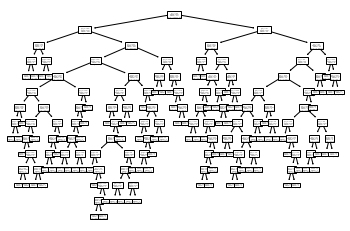

In [14]:
tree.plot_tree(model[9]) # gerando a árvore do último fold

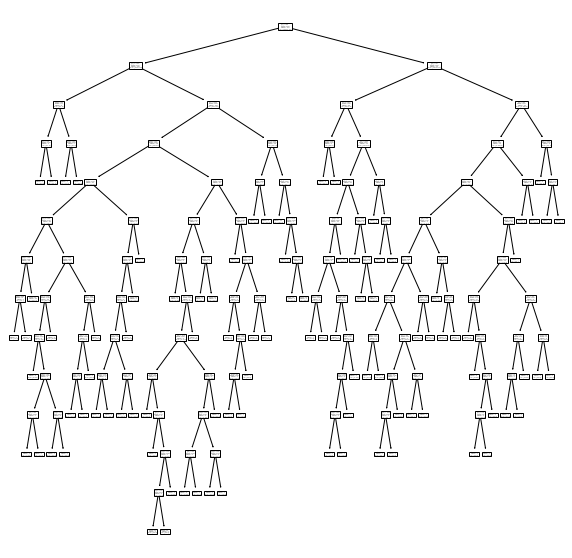

In [15]:
fig = plt.figure(figsize=(10,10))
fig = tree.plot_tree(model[9])

### Métricas

In [16]:
# Precisão dos modelos de cada fold através da função accuracy_score()
print(score)

[0.9342723004694836, 0.9389671361502347, 0.9248826291079812, 0.9295774647887324, 0.9248826291079812, 0.9342723004694836, 0.9014084507042254, 0.9577464788732394, 0.9389671361502347, 0.9473684210526315]


In [17]:
# Gerando matriz de confusão de cada modelo
for i in range(10):
    y_test = y.iloc[kfolds[i][1]]
    print(f"{i+1}º modelo:")
    print(confusion_matrix(y_test, test[i]))
    print("---------------")

1º modelo:
[[157   6   0]
 [  5  27   0]
 [  0   3  15]]
---------------
2º modelo:
[[164   4   0]
 [  5  21   0]
 [  4   0  15]]
---------------
3º modelo:
[[171   5   1]
 [  5  11   1]
 [  1   3  15]]
---------------
4º modelo:
[[156   4   1]
 [  8  24   0]
 [  2   0  18]]
---------------
5º modelo:
[[159  10   0]
 [  6  30   0]
 [  0   0   8]]
---------------
6º modelo:
[[164   4   0]
 [  7  22   1]
 [  2   0  13]]
---------------
7º modelo:
[[155   7   1]
 [  9  23   0]
 [  2   2  14]]
---------------
8º modelo:
[[159   2   2]
 [  4  27   1]
 [  0   0  18]]
---------------
9º modelo:
[[165   2   1]
 [  7  18   1]
 [  2   0  17]]
---------------
10º modelo:
[[149   5   1]
 [  4  27   1]
 [  0   0  22]]
---------------


In [43]:
# Função com as principais métricas de classificação
accuracy = []
for i in range(10):
    y_test = y.iloc[kfolds[i][1]]
    print(f"{i+1}º modelo:")
    print(classification_report(y_test, test[i]))
    accuracy.append((classification_report(y_test, test[i], output_dict=True)['accuracy']))
    
    print("-----------------------------------------------------")

1º modelo:
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       163
         2.0       0.75      0.84      0.79        32
         3.0       1.00      0.83      0.91        18

    accuracy                           0.93       213
   macro avg       0.91      0.88      0.89       213
weighted avg       0.94      0.93      0.94       213

-----------------------------------------------------
2º modelo:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       168
         2.0       0.84      0.81      0.82        26
         3.0       1.00      0.79      0.88        19

    accuracy                           0.94       213
   macro avg       0.93      0.86      0.89       213
weighted avg       0.94      0.94      0.94       213

-----------------------------------------------------
3º modelo:
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.9

In [44]:
# Média da acurácia de todos os modelos
np.mean(accuracy)

0.9332344946874228

In [46]:
# Desvio padrão da acurácia de todos os modelos
np.std(accuracy)

0.014262762501711154